# Setup

You'll want to set file paths here.

If you need to unzip the spatial/cells file:

`!tar -xzf <file_path_spatial>.gz -C <data_dir>`

(replacing <file_path_spatial> and <data_dir> with the paths to the cells.csv.gz file and the data directory).

In [1]:
%load_ext autoreload
%autoreload 2

import crispr as cr
import squidpy as sq
import os
import pandas as pd


data_dir = str("/home/asline01/projects/data/public/spatial/xenium_colon/"
               "Xenium_V1_hColon_Non_diseased_Add_on_FFPE_outs")

file_path = os.path.join(data_dir, "cell_feature_matrix.h5")
file_path_spatial = os.path.join(data_dir, "cells.csv")

pd.options.display.max_columns = 100


# Object

In [2]:
self = cr.Spatial(file_path, file_path_spatial)



<<< INITIALIZING SPATIAL CLASS OBJECT >>>



<<< INITIALIZING CRISPR CLASS OBJECT >>>


<<< LOADING 10X .h5 FILE /home/asline01/projects/data/public/spatial/xenium_colon/Xenium_V1_hColon_Non_diseased_Add_on_FFPE_outs/cell_feature_matrix.h5 >>>
H5 File Format (/home/asline01/projects/data/public/spatial/xenium_colon/Xenium_V1_hColon_Non_diseased_Add_on_FFPE_outs/cell_feature_matrix.h5)




Cell Counts: Raw

275822


Gene Counts: Raw



 AnnData object with n_obs × n_vars = 275822 × 425
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'counts'



col_gene_symbols='gene_symbols'
col_cell_type='leiden'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condition=np.nan
key_control=np.nan
key_treatment=np.nan


 AnnData object with n_obs × n_vars = 275822 × 425
    var: 'gene_ids', 'feature_types', 'genome'
    layers: 'counts'



col_gene_symbols='gene_symbols'
col_cell_type='leiden'
col_sample_id='standard_sample_id'
col_batch='standard_sample_id'
col_condit

# Preprocessing

AnnData object with n_obs × n_vars = 275822 × 425
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'
    layers: 'counts'

Un-Used Keyword Arguments: {'assay_protein': None, 'col_batch': 'standard_sample_id', 'col_condition': None, 'kws_umap': {'min_dist': 0.3}}




Cell Counts: Initial

275822


Gene Counts: Initial

None 

 10 

                gene_ids    feature_types   genome
count               425              425      425
unique              425                1        1
top     ENSG00000141338  Gene Expression  Unknown
freq                  1              425      425 



<<< PERFORMING QUALITY CONTROL ANALYSIS>>>


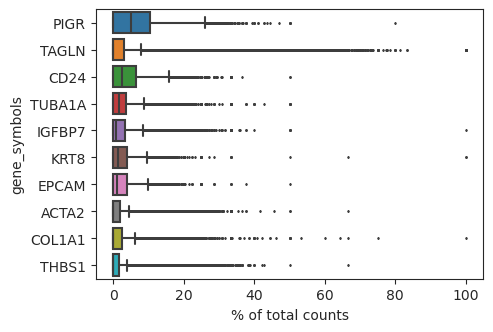


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


unhashable type: 'list'
unhashable type: 'list'
unhashable type: 'list'
unhashable type: 'list'


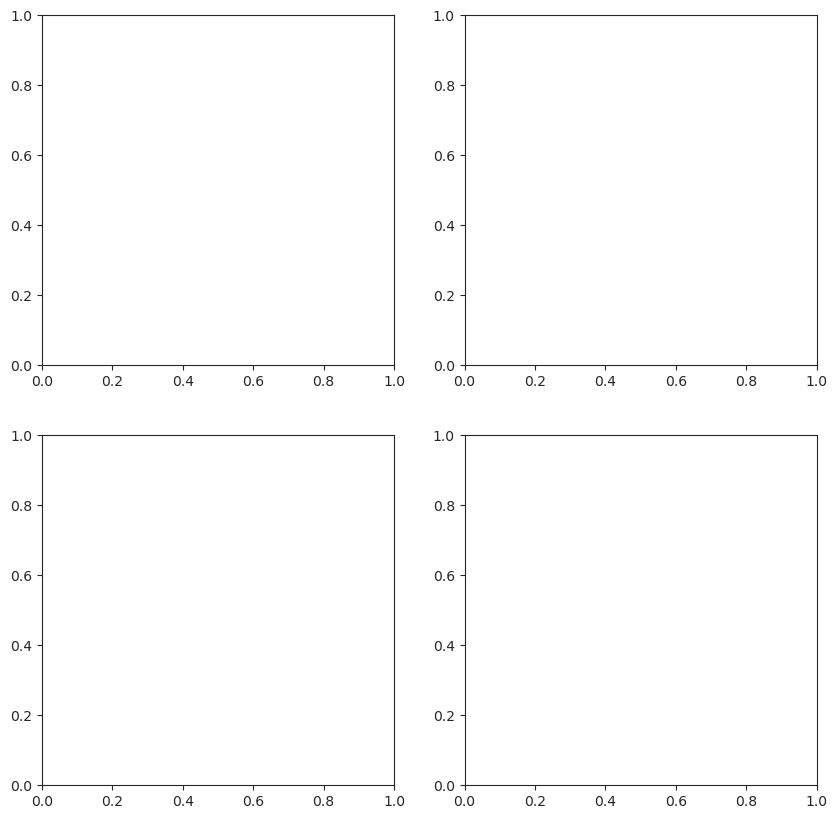

unhashable type: 'list'


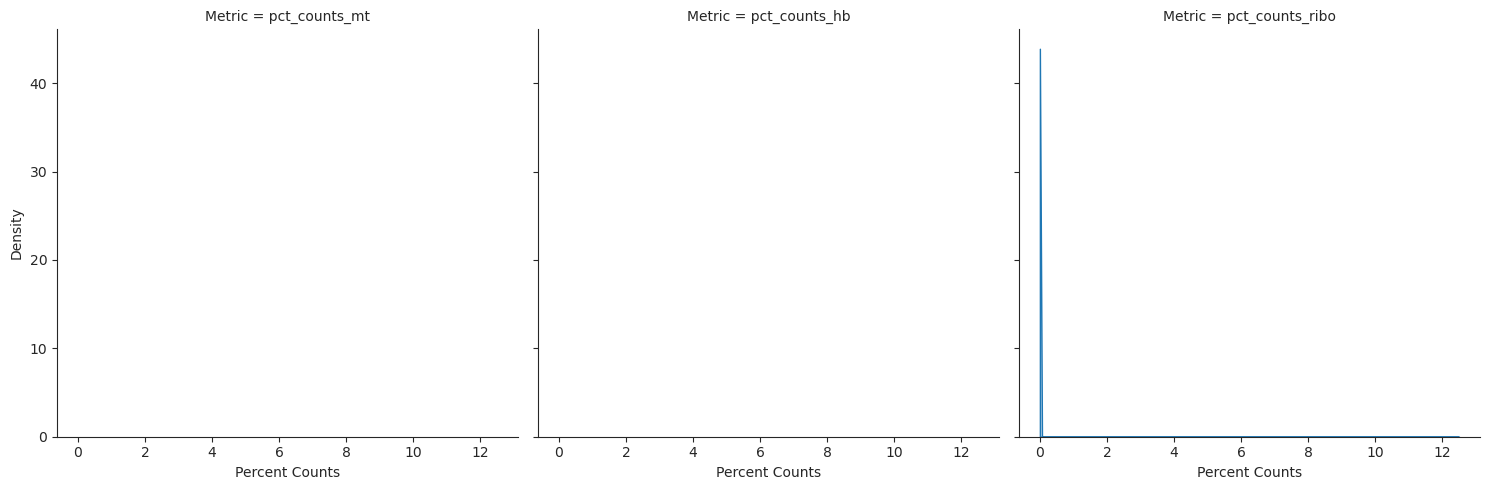

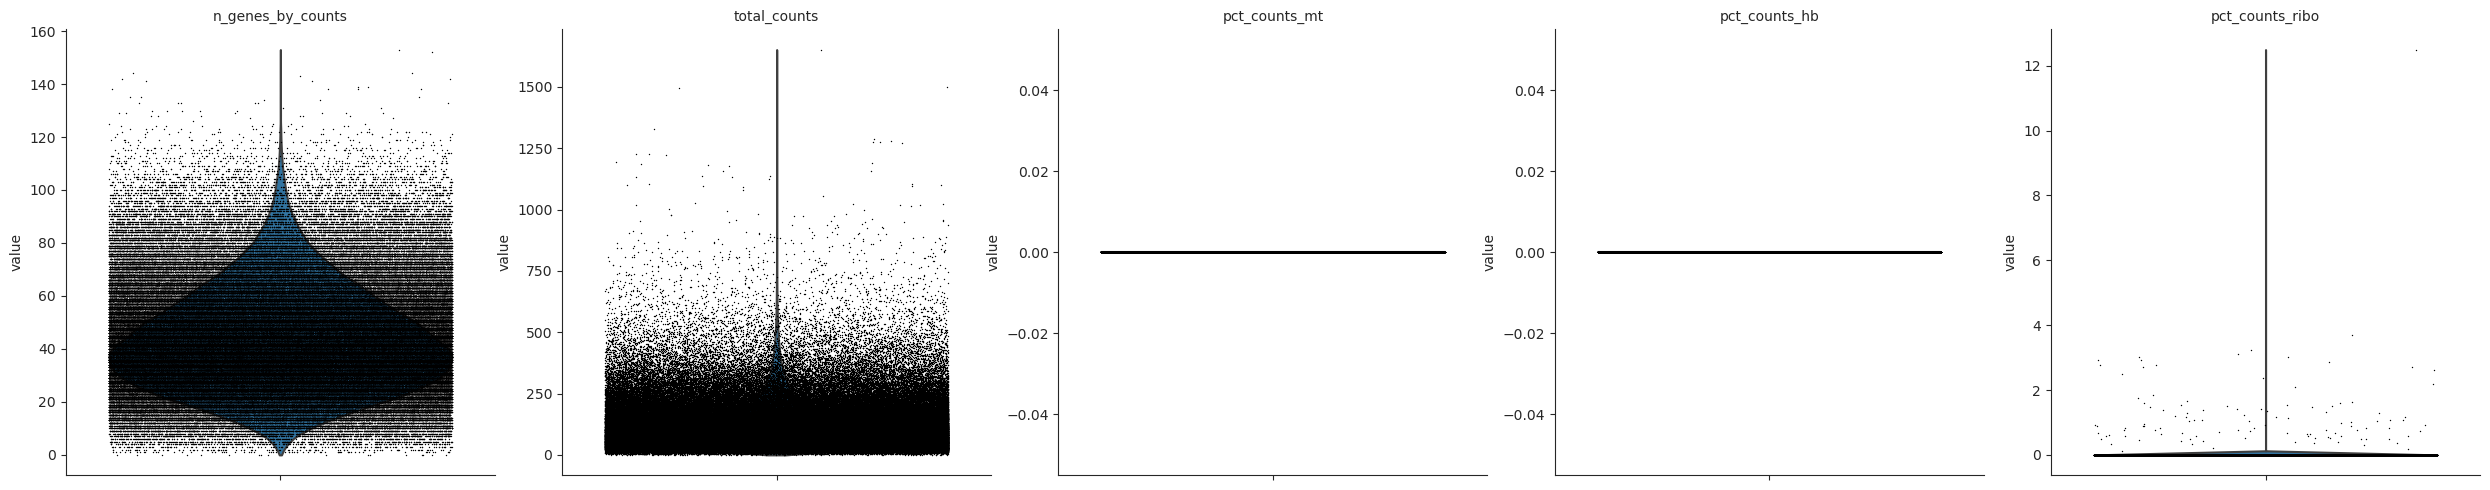

       n_cells_by_counts  mean_counts  log1p_mean_counts  \
count         425.000000   425.000000         425.000000   
mean        28055.642353     0.265396           0.181828   
std         32962.008761     0.640620           0.275205   
min           110.000000     0.000402           0.000402   
25%          5210.000000     0.024266           0.023976   
50%         14705.000000     0.078355           0.075437   
75%         37848.000000     0.240829           0.215780   
max        196510.000000     8.310059           2.231095   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count             425.000000  4.250000e+02          425.000000  
mean               89.828352  7.320216e+04            9.943056  
std                11.950464  1.766970e+05            1.681506  
min                28.754777  1.110000e+02            4.718499  
25%                86.278107  6.693000e+03            8.808967  
50%                94.668663  2.161200e+04            9.981050  
75% 

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.

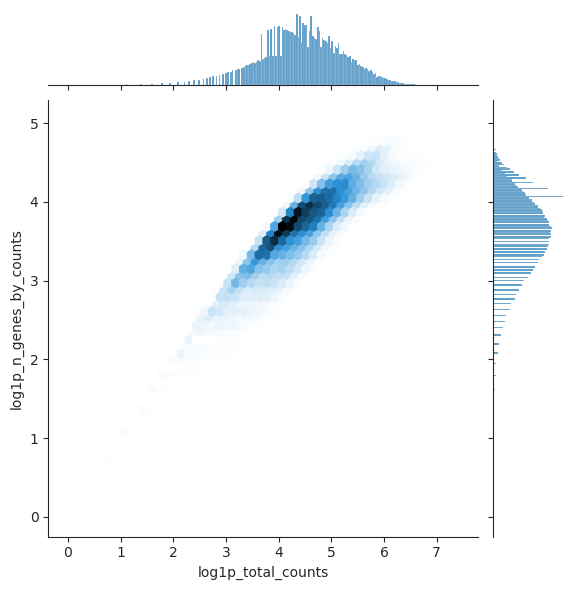

In [5]:
kws_pp = {"kws_hvg": {"min_mean": 0.0125, "max_mean": 10, 
                      "min_disp": 0.5, "flavor": "cell_ranger"}, 
          "target_sum": 10000.0, "cell_filter_pmt": [0, 15], 
          "cell_filter_ngene": [200, None], "cell_filter_ncounts": [3, 40000], 
          "gene_filter_ncell": [3, None], "regress_out": None, 
          "kws_scale": "log", "kws_umap": {"min_dist": 0.3}}
self.preprocess(**kws_pp)

# Plots

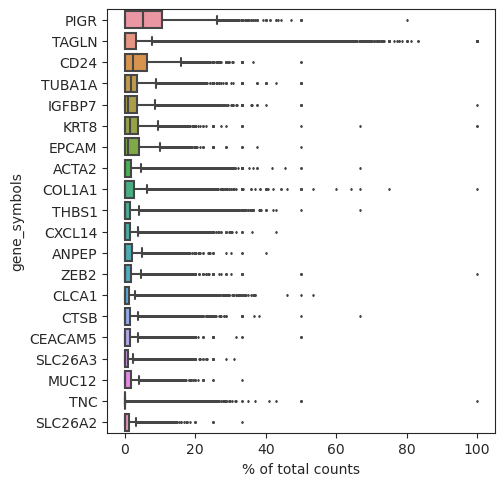


	*** Detecting Mitochondrial, Ribosomal, Hemoglobin genes...

	*** Calculating & plotting QC metrics...


`x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`
`x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`
`x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`
`x`, `y`, and potential `color` inputs must all come from either `.obs` or `.var`


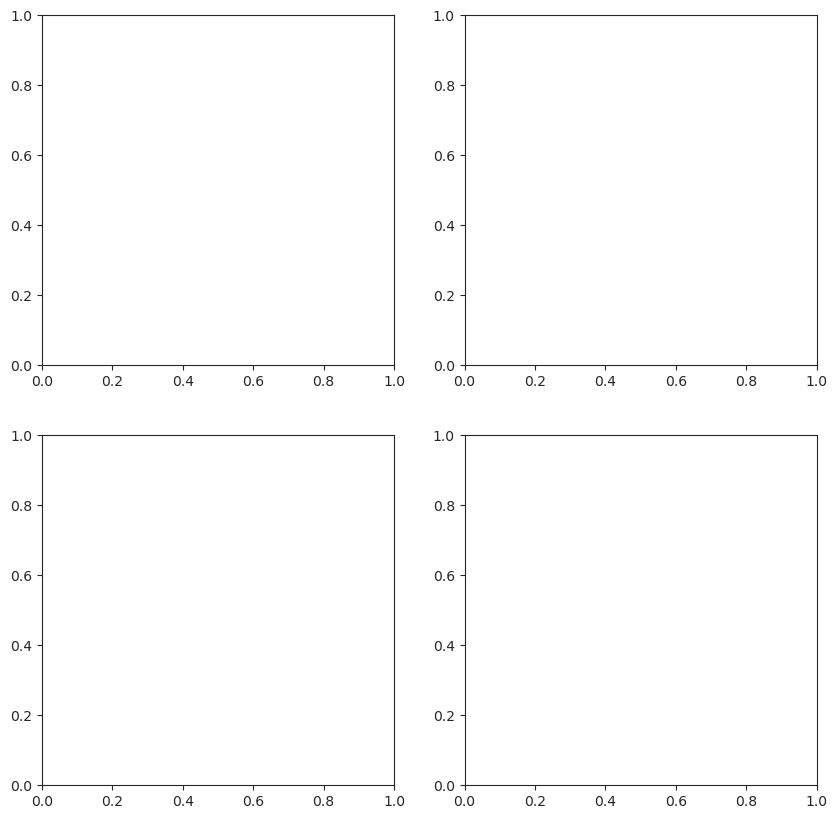

"['standard_sample_id'] not in index"


... storing 'feature_types' as categorical
... storing 'genome' as categorical


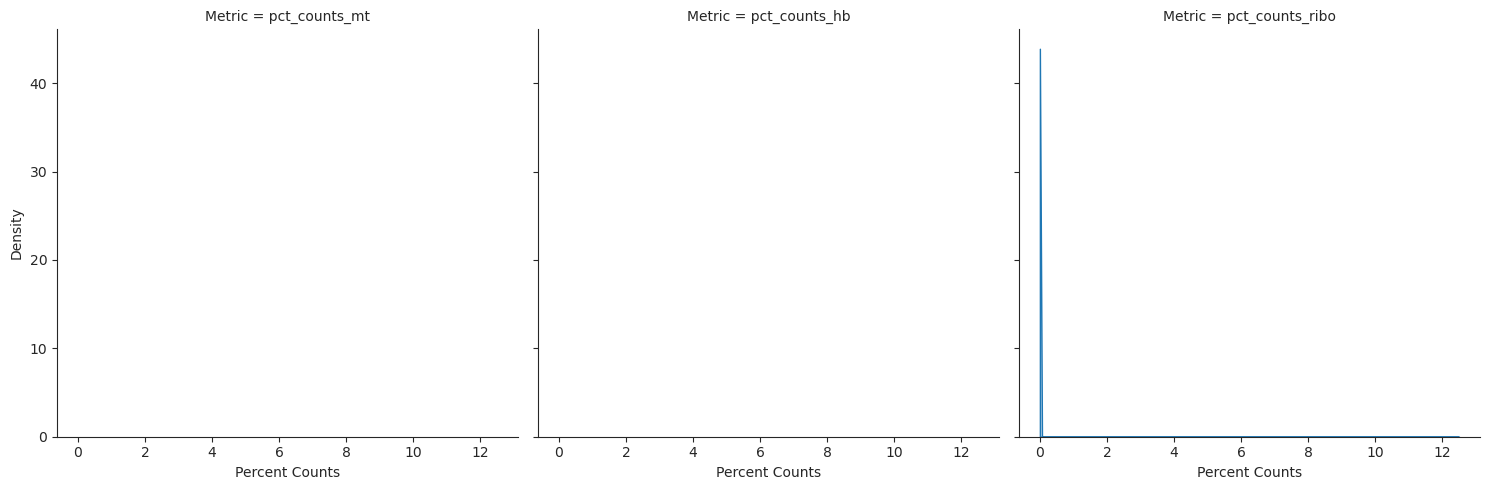

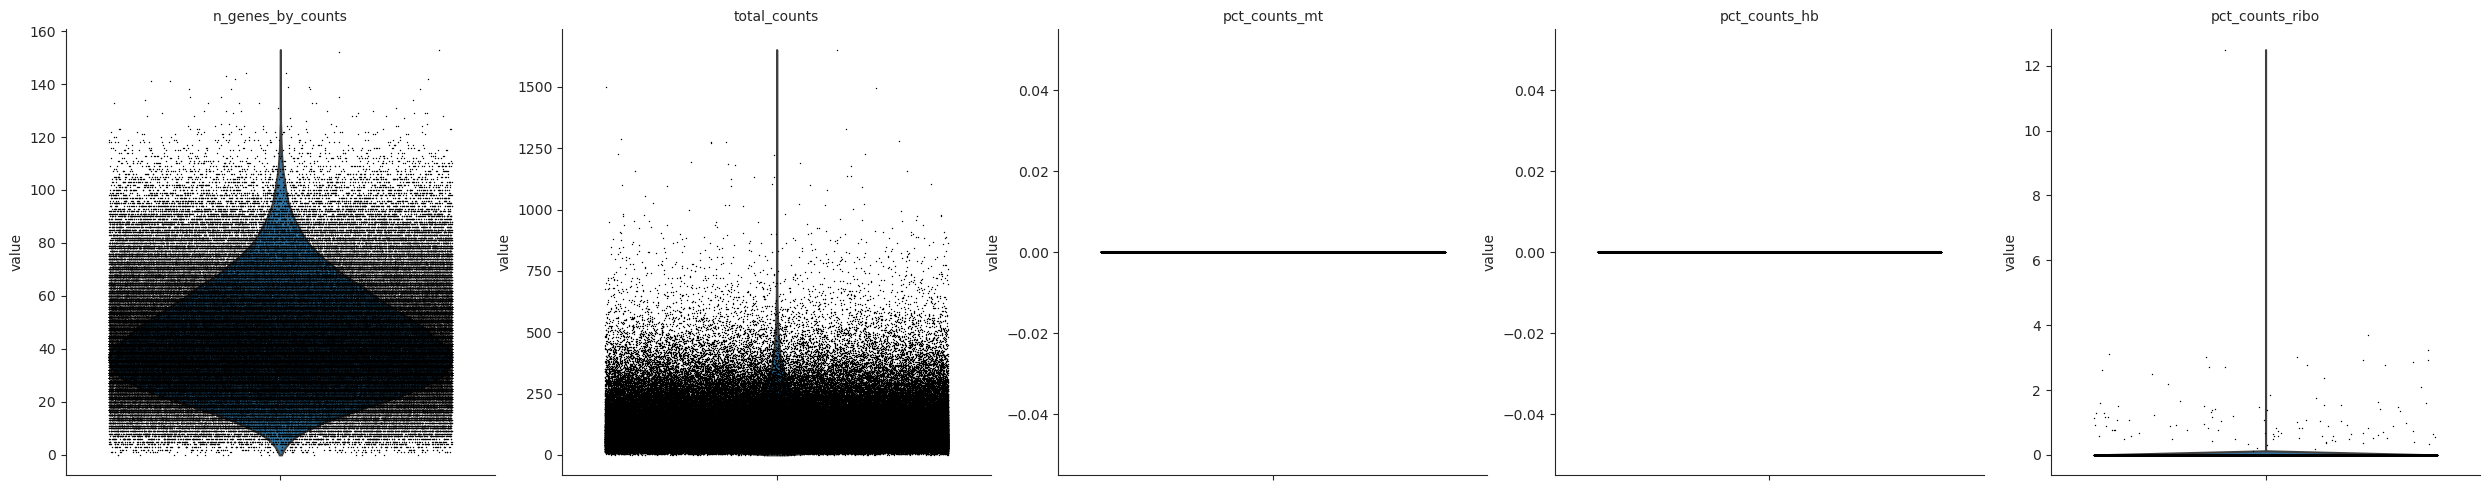

... storing 'feature_types' as categorical
... storing 'genome' as categorical


       n_cells_by_counts  mean_counts  log1p_mean_counts  \
count         425.000000   425.000000         425.000000   
mean        28055.642353     0.265396           0.181828   
std         32962.008761     0.640620           0.275205   
min           110.000000     0.000402           0.000402   
25%          5210.000000     0.024266           0.023976   
50%         14705.000000     0.078355           0.075437   
75%         37848.000000     0.240829           0.215780   
max        196510.000000     8.310059           2.231095   

       pct_dropout_by_counts  total_counts  log1p_total_counts  
count             425.000000  4.250000e+02          425.000000  
mean               89.828352  7.320216e+04            9.943056  
std                11.950464  1.766970e+05            1.681506  
min                28.754777  1.110000e+02            4.718499  
25%                86.278107  6.693000e+03            8.808967  
50%                94.668663  2.161200e+04            9.981050  
75% 

{'gex': {'gene_expression': TypeError("heatmap() missing 1 required positional argument: 'groupby'"),
  'gene_expression_counts': TypeError("heatmap() missing 1 required positional argument: 'groupby'"),
  'gene_expression_violin_None': TypeError("'NoneType' object is not iterable"),
  'gene_expression_violin_counts_counts': TypeError("'NoneType' object is not iterable"),
  'gene_expression_dot': TypeError("'NoneType' object is not iterable")}}

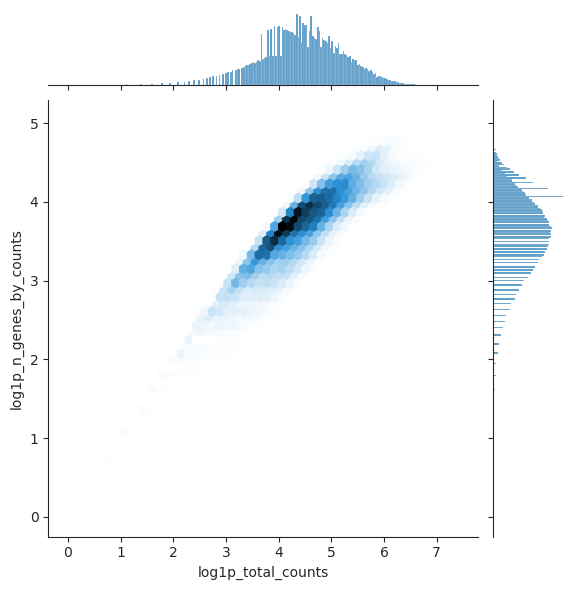

In [3]:
self.plot()